In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tqdm import tqdm
from torch.nn.utils import spectral_norm


/root/miniconda3/envs/myconda/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# ads = pd.read_csv('train/train_data_ads.csv')
feeds = pd.read_csv('train/train_data_feeds.csv')

In [55]:
char_to_int = {
    '0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9,
    'a': 10, 'b': 11, 'c': 12, 'd': 13, 'e': 14, 'f': 15, 'g': 16, 'h': 17, 'i': 18,
    'j': 19, 'k': 20, 'l': 21, 'm': 22, 'n': 23, 'o': 24, 'p': 25, 'q': 26, 'r': 27,
    's': 28, 't': 29, 'u': 30, 'v': 31, 'w': 32, 'x': 33, 'y': 34, 'z': 35
}

def string_to_vector(string):
    return [char_to_int[char] for char in string]

int_to_char = {}

for item in char_to_int:
    int_to_char[char_to_int.get(item)] = item
    
def vector_to_string(vector):
    return [int_to_char[int] for int in vector]

In [40]:
i_s_sourceId_tensor = torch.tensor(feeds['i_s_sourceId'].apply(string_to_vector), dtype=torch.float32)
i_s_sourceId_tensor

In [56]:
import torch
import torch.nn as nn
import torch.optim as optim

# 将训练数据转换为PyTorch张量
feeds['i_s_sourceId_vector'] = feeds['i_s_sourceId'].apply(string_to_vector)
train_tensor = torch.tensor(feeds['i_s_sourceId_vector'], dtype=torch.float32)

# 定义自动编码器类
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # 编码器部分
        self.encoder = nn.Sequential(
            nn.Linear(40, 30),
            nn.ReLU(),
            nn.Linear(30, 20),
            nn.ReLU(),
            nn.Linear(20, 10),
            nn.ReLU(),
            nn.Linear(10, 5),
        )
        # 解码器部分
        self.decoder = nn.Sequential(
            nn.Linear(5, 10),
            nn.ReLU(),
            nn.Linear(10, 20),
            nn.ReLU(),
            nn.Linear(20, 30),
            nn.ReLU(),
            nn.Linear(30, 40),
        )
    
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# 创建模型实例
model = Autoencoder()

# 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 打印模型结构
print(model)

batch_size = 128

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=40, out_features=30, bias=True)
    (1): ReLU()
    (2): Linear(in_features=30, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=10, bias=True)
    (5): ReLU()
    (6): Linear(in_features=10, out_features=5, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=5, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=30, bias=True)
    (5): ReLU()
    (6): Linear(in_features=30, out_features=40, bias=True)
  )
)


In [57]:
# 示例训练过程
num_epochs = 10000
for epoch in range(num_epochs):
    
    train_tensor = i_s_sourceId_tensor[torch.randint(0, len(i_s_sourceId_tensor), (batch_size,))]
    outputs = model(train_tensor)
    loss = criterion(outputs, train_tensor)
    
    # 反向传播
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # 打印每个 epoch 的损失
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# 训练完成后，对训练数据进行编码和解码
encoded_data = model.encoder(train_tensor).detach().numpy()
decoded_data = model.decoder(torch.tensor(encoded_data)).detach().numpy()




Epoch [100/10000], Loss: 20.1332
Epoch [200/10000], Loss: 20.5296
Epoch [300/10000], Loss: 20.6210
Epoch [400/10000], Loss: 20.6034
Epoch [500/10000], Loss: 20.2737
Epoch [600/10000], Loss: 20.0955
Epoch [700/10000], Loss: 20.6207
Epoch [800/10000], Loss: 20.1946
Epoch [900/10000], Loss: 20.9789
Epoch [1000/10000], Loss: 20.3755
Epoch [1100/10000], Loss: 19.9276
Epoch [1200/10000], Loss: 20.4295
Epoch [1300/10000], Loss: 20.0766
Epoch [1400/10000], Loss: 20.5197
Epoch [1500/10000], Loss: 20.4919
Epoch [1600/10000], Loss: 20.6514
Epoch [1700/10000], Loss: 20.3837
Epoch [1800/10000], Loss: 20.4997
Epoch [1900/10000], Loss: 20.1057
Epoch [2000/10000], Loss: 18.6835
Epoch [2100/10000], Loss: 18.6400
Epoch [2200/10000], Loss: 17.6887
Epoch [2300/10000], Loss: 18.4463
Epoch [2400/10000], Loss: 16.6917
Epoch [2500/10000], Loss: 17.0888
Epoch [2600/10000], Loss: 17.6643
Epoch [2700/10000], Loss: 16.7827
Epoch [2800/10000], Loss: 16.0914
Epoch [2900/10000], Loss: 15.2623
Epoch [3000/10000], Los

In [42]:
print(f'Original Data: {train_tensor.numpy()}')

rounded_decoded_data = np.round(decoded_data)
rounded_decoded_data[rounded_decoded_data > 35] = 35
rounded_decoded_data[rounded_decoded_data < 0] = 0
print(f'Decoded Data: {rounded_decoded_data}')

Original Data: [[ 7.  7.  2. ...  9. 10.  2.]
 [ 6.  4.  5. ...  3. 12.  9.]
 [12. 14.  4. ...  4.  4.  1.]
 ...
 [ 5.  8. 10. ...  3.  0.  6.]
 [15.  5. 10. ...  0.  2.  5.]
 [ 3. 10.  7. ...  1.  8.  5.]]
Decoded Data: [[ 9.  9.  4. ...  9. 11.  4.]
 [ 6.  4.  5. ...  3. 13.  9.]
 [ 8.  9. 10. ...  6.  6.  8.]
 ...
 [ 5.  8.  9. ...  3.  1.  6.]
 [ 8.  9. 10. ...  5.  7.  5.]
 [ 6.  9. 10. ...  4.  5.  9.]]


In [48]:
np.apply_along_axis(''.join, axis=1, arr=pd.DataFrame(np.apply_along_axis(vector_to_string, axis=1, arr=rounded_decoded_data)))

array(['994c4a3683b2aa3690481d24b5bac553a89d59b4',
       '645e67afbbafce4059aa8fea55838c40113f33d9',
       '89a777777878887c868b98948687799969976668',
       '368daaba8ad9a9716da9956924769aa4954998b9',
       'a7f53e55a5bf26e842dacccc69e8c868be49a5d9',
       '63ac02aa3c4866643a41758c6a92240c857bbd87',
       'd6877a05524a3386955838878897a4945e6879a8',
       '7677c7a99a6687a15a75865a377668668575a885',
       '105f7bb14ed8a5b017ab25126774d8d7f32d9ded',
       '78921bf79ac456ba228cgd757993378ae3585674',
       '978c84765d2a95999a68459b9b87669c9acbcb5b',
       '8491d675537d255479b1a76946b78b5c3b7266bd',
       '8491d675537d255479b1a76946b78b5c3b7266bd',
       '0c8b9bcc1e8178af028da03f510f0d25963cf265',
       '978c84765d2a95999a68459b9b87669c9acbcb5b',
       '669713662948654b656676848784364b57896759',
       '66b646aa698668763675c9875693492874667794',
       '9aa8bbabb9a79aa7799aca9957988a8598878795',
       '88a9a5997b5a98889b88879a78877a7a78a8a86a',
       '544888724a7673844788323

In [49]:
feeds['i_s_sourceId']

0          1eba881ea576fc05dfe457dd2111cd1505caa5a8
1          772b4a2593c3aa2590291f25d4bbc463a9ac49a2
2          645e57afbbafce5159ab7fe956837c40103f33c9
3          9e5226ef81bf205dfe0ceefd6b7124ead82a6416
4          3a705744387ea91d68ce6b8172b528c53df49185
                             ...                   
3227727    645e57afbbafce5159ab7fe956837c40103f33c9
3227728    a6f40e36a4df17eb23baceafa8b8a839ff05d4fa
3227729    f8522f3692a0433a305f37d32b16e94df3d6cc22
3227730    9e5226ef81bf205dfe0ceefd6b7124ead82a6416
3227731    14cbe3735e6fd61add145586131b3cab9eb4280b
Name: i_s_sourceId, Length: 3227732, dtype: object

In [40]:
# # 计算feeds['i_docId']每个值的频数
# i_docId_counts = feeds['i_docId'].value_counts()

# # 计算ads['i_s_sourceId']每个值的频数
# i_s_sourceId_counts = feeds['i_s_sourceId'].value_counts()

# # 计算feeds['i_entities']每个值的频数
# i_entities_counts = feeds['i_entities'].value_counts()

# # 打印结果
# print("i_docId counts:")
# print(i_docId_counts)

# print("i_s_sourceId counts:")
# print(i_s_sourceId_counts)

# print("i_entities counts:")
# print(i_entities_counts)

print(feeds['i_s_sourceId'].apply(str).apply(len).max())
print(feeds['i_docId'].apply(str).apply(len).max())
print(feeds['i_entities'].apply(str).apply(len).max())

40
40
324


# Advertisers 

In [3]:
ads.head()

,log_id,label,user_id,age,gender,residence,city,city_rank,series_dev,series_group,...,ad_click_list_v001,ad_click_list_v002,ad_click_list_v003,ad_close_list_v001,ad_close_list_v002,ad_close_list_v003,pt_d,u_newsCatInterestsST,u_refreshTimes,u_feedLifeCycle
0,373250,0,100005,3,2,16,147,2,32,6,...,30157^30648^14278^31706,2066^1776^1036,114^219^312,24107,1218,173,202206030326,39^220^16,0,15
1,373253,1,100005,3,2,16,147,2,32,6,...,30157^30648^14278^31706,2066^1776^1036,114^219^312,24107,1218,173,202206030326,39^220^16,0,15
2,373252,1,100005,3,2,16,147,2,32,6,...,30157^30648^14278^31706,2066^1776^1036,114^219^312,24107,1218,173,202206030326,39^220^16,0,15
3,373251,0,100005,3,2,16,147,2,32,6,...,30157^30648^14278^31706,2066^1776^1036,114^219^312,24107,1218,173,202206030326,39^220^16,0,15
4,373255,0,100005,3,2,16,147,2,32,6,...,30157^30648^14278^31706,2066^1776^1036,114^219^312,24107,1218,173,202206030328,39^220^16,0,15


In [4]:
ads.columns

Index(['log_id', 'label', 'user_id', 'age', 'gender', 'residence', 'city',
       'city_rank', 'series_dev', 'series_group', 'emui_dev', 'device_name',
       'device_size', 'net_type', 'task_id', 'adv_id', 'creat_type_cd',
       'adv_prim_id', 'inter_type_cd', 'slot_id', 'site_id', 'spread_app_id',
       'hispace_app_tags', 'app_second_class', 'app_score',
       'ad_click_list_v001', 'ad_click_list_v002', 'ad_click_list_v003',
       'ad_close_list_v001', 'ad_close_list_v002', 'ad_close_list_v003',
       'pt_d', 'u_newsCatInterestsST', 'u_refreshTimes', 'u_feedLifeCycle'],
      dtype='object')

In [4]:
object_columns = ads.select_dtypes(include='object').columns

# delete the '^' 
for col in object_columns:
    ads[col] = ads[col].apply(lambda x: x.split('^'))

# fixed length
fixed_length = 5

# pad or truncate 
def pad_or_truncate(lst, length):
    if len(lst) > length:
        return lst[:length]
    else:
        return lst + ['0'] * (length - len(lst))

for col in object_columns:
    ads[col] = ads[col].apply(lambda x: pad_or_truncate(x, fixed_length))

In [6]:
ads[object_columns].head()

,ad_click_list_v001,ad_click_list_v002,ad_click_list_v003,ad_close_list_v001,ad_close_list_v002,ad_close_list_v003,u_newsCatInterestsST
0,"[30157, 30648, 14278, 31706, 0]","[2066, 1776, 1036, 0, 0]","[114, 219, 312, 0, 0]","[24107, 0, 0, 0, 0]","[1218, 0, 0, 0, 0]","[173, 0, 0, 0, 0]","[39, 220, 16, 0, 0]"
1,"[30157, 30648, 14278, 31706, 0]","[2066, 1776, 1036, 0, 0]","[114, 219, 312, 0, 0]","[24107, 0, 0, 0, 0]","[1218, 0, 0, 0, 0]","[173, 0, 0, 0, 0]","[39, 220, 16, 0, 0]"
2,"[30157, 30648, 14278, 31706, 0]","[2066, 1776, 1036, 0, 0]","[114, 219, 312, 0, 0]","[24107, 0, 0, 0, 0]","[1218, 0, 0, 0, 0]","[173, 0, 0, 0, 0]","[39, 220, 16, 0, 0]"
3,"[30157, 30648, 14278, 31706, 0]","[2066, 1776, 1036, 0, 0]","[114, 219, 312, 0, 0]","[24107, 0, 0, 0, 0]","[1218, 0, 0, 0, 0]","[173, 0, 0, 0, 0]","[39, 220, 16, 0, 0]"
4,"[30157, 30648, 14278, 31706, 0]","[2066, 1776, 1036, 0, 0]","[114, 219, 312, 0, 0]","[24107, 0, 0, 0, 0]","[1218, 0, 0, 0, 0]","[173, 0, 0, 0, 0]","[39, 220, 16, 0, 0]"


In [5]:
# split into multiple columns
def split_list_column(df, column_name, new_column_prefix):
    max_length = df[column_name].apply(len).max()
    split_columns = pd.DataFrame(df[column_name].tolist(),
                                 columns=[f'{new_column_prefix}_{i+1}' for i in range(max_length)])
    df = df.drop(columns=[column_name]).join(split_columns)
    return df

ads = split_list_column(ads, 'ad_click_list_v001', 'ad_click_list_v001')
ads = split_list_column(ads, 'ad_click_list_v002', 'ad_click_list_v002')
ads = split_list_column(ads, 'ad_click_list_v003', 'ad_click_list_v003')
ads = split_list_column(ads, 'ad_close_list_v001', 'ad_close_list_v001')
ads = split_list_column(ads, 'ad_close_list_v002', 'ad_close_list_v002')
ads = split_list_column(ads, 'ad_close_list_v003', 'ad_close_list_v003')
ads = split_list_column(ads, 'u_newsCatInterestsST', 'u_newsCatInterestsST')

In [8]:
for column in ads.columns:
    if ads[column].dtype == object: #int or float
        print(f"Column: {column}, Data Type: {ads[column].dtype}")

Column: ad_click_list_v001_1, Data Type: object
Column: ad_click_list_v001_2, Data Type: object
Column: ad_click_list_v001_3, Data Type: object
Column: ad_click_list_v001_4, Data Type: object
Column: ad_click_list_v001_5, Data Type: object
Column: ad_click_list_v002_1, Data Type: object
Column: ad_click_list_v002_2, Data Type: object
Column: ad_click_list_v002_3, Data Type: object
Column: ad_click_list_v002_4, Data Type: object
Column: ad_click_list_v002_5, Data Type: object
Column: ad_click_list_v003_1, Data Type: object
Column: ad_click_list_v003_2, Data Type: object
Column: ad_click_list_v003_3, Data Type: object
Column: ad_click_list_v003_4, Data Type: object
Column: ad_click_list_v003_5, Data Type: object
Column: ad_close_list_v001_1, Data Type: object
Column: ad_close_list_v001_2, Data Type: object
Column: ad_close_list_v001_3, Data Type: object
Column: ad_close_list_v001_4, Data Type: object
Column: ad_close_list_v001_5, Data Type: object
Column: ad_close_list_v002_1, Data Type:

In [2]:
ads = pd.read_csv('train/ads.csv')

In [5]:
ads.dtypes

log_id                    int64
label                     int64
user_id                   int64
age                       int64
gender                    int64
                          ...  
u_newsCatInterestsST_1    int64
u_newsCatInterestsST_2    int64
u_newsCatInterestsST_3    int64
u_newsCatInterestsST_4    int64
u_newsCatInterestsST_5    int64
Length: 63, dtype: object

In [6]:
import torch
import torch.nn as nn

# Conditional GAN model architecture
class Generator(nn.Module): 
    def __init__(self, input_size, condition_size, output_size):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size + condition_size, 128),
            nn.ReLU(True),
            nn.Linear(128, 256),
            nn.ReLU(True),
            nn.Linear(256, 512),
            nn.ReLU(True),
            nn.Linear(512, output_size)
        )
    
    def forward(self, x, c):
        # Concatenate noise and condition
        x = torch.cat((x, c), 1)
        return self.model(x)


class Discriminator(nn.Module):
    def __init__(self, input_size, condition_size):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            spectral_norm(nn.Linear(input_size + condition_size, 512)),  
            nn.LeakyReLU(0.2, inplace=True),
            spectral_norm(nn.Linear(512, 256)), 
            nn.LeakyReLU(0.2, inplace=True),
            spectral_norm(nn.Linear(256, 128)),  
            nn.LeakyReLU(0.2, inplace=True),
            spectral_norm(nn.Linear(128, 1)), 
            nn.Sigmoid()
        )
    
    def forward(self, x, c):
        # Concatenate input and condition
        x = torch.cat((x, c), 1)
        return self.model(x)


In [24]:
# hyperparameters
input_size = 100  
output_size = len(ads.drop('label', axis=1).columns)  
condition_size = 1

num_epochs = 10000
batch_size = 128
# half_batch_size = 64

learning_rate = 0.0001
learning_rate_d = 0.00001

# initialization
generator = Generator(input_size, condition_size, output_size)
discriminator = Discriminator(output_size, condition_size)

# loss function & optimizer
criterion = nn.BCELoss()
generator_optimizer = optim.Adam(generator.parameters(), lr=learning_rate)
discriminator_optimizer = optim.Adam(discriminator.parameters(), lr=learning_rate)

# standardize
scaler = MinMaxScaler()
# StandardScaler()
ads_scaled = scaler.fit_transform(ads)

# convert to tensor
ads_data = torch.tensor(ads_scaled, dtype=torch.float32)
# ads_data_1 = ads_data[ads_data[:, 1] > 0.5]
# ads_data_0 = ads_data[ads_data[:, 1] <= 0.5]


In [33]:
# G_losses = []
# D_losses = []
# G_Accuracys = []
# D_Accuracys = []

# # Training
# for epoch in range(num_epochs):
    
#     discriminator_optimizer.zero_grad() 
    
#     real_data_0 = ads_data_0[torch.randint(0, len(ads_data_0), (half_batch_size,))]
#     real_data_1 = ads_data_1[torch.randint(0, len(ads_data_1), (half_batch_size,))]
#     combined_data = torch.cat((real_data_0, real_data_1), dim=0)
#     shuffled_indices = torch.randperm(combined_data.size(0))
#     real_data = combined_data[shuffled_indices]
    
#     real_condition = real_data[:, 1].unsqueeze(1)
#     real_samples = torch.cat((real_data[:, :1], real_data[:, 2:]), dim=1)
#     real_labels = torch.ones(batch_size, 1)
    
#     # generate fake data
#     noise = torch.randn(batch_size, input_size)
#     fake_condition = torch.randint(0, 2, (batch_size,1))
#     fake_samples = generator(noise, fake_condition)
#     fake_labels = torch.zeros(batch_size, 1)
    
#     # loss for discriminator 
#     real_output = discriminator(real_samples, real_condition)
#     fake_output = discriminator(fake_samples.detach(), fake_condition)
#     real_loss = criterion(real_output, real_labels)
#     fake_loss = criterion(fake_output, fake_labels)
#     discriminator_loss = real_loss + fake_loss
    
#     discriminator_loss.backward()
#     discriminator_optimizer.step()

#     # clear gradients
#     generator_optimizer.zero_grad() 
    
#     # generate fake data
#     noise = torch.randn(batch_size, input_size)
#     fake_condition = torch.randint(0, 2, (batch_size,1))
#     fake_samples = generator(noise, fake_condition)
#     fake_output = discriminator(fake_samples, fake_condition)
    
#     # loss for generator
#     generator_loss = criterion(fake_output, real_labels)
    
#     generator_loss.backward()
#     generator_optimizer.step()
    
#     # Print loss and other information every 100 epochs
#     if (epoch + 1) % 100 == 0:
#         # Calculate discriminator accuracy
#         real_accuracy = (real_output > 0.5).float().mean().item()
#         fake_accuracy = (fake_output < 0.5).float().mean().item()
#         d_accuracy = 0.5 * (real_accuracy + fake_accuracy)

#         # Calculate generator accuracy
#         g_accuracy = (fake_output > 0.5).float().mean().item()
        
#         G_losses.append(generator_loss.item())
#         D_losses.append(discriminator_loss.item())
#         G_Accuracys.append(d_accuracy)
#         D_Accuracys.append(g_accuracy)
        
#         # Print losses and accuracies
#         tqdm.write(f"Epoch [{epoch + 1}/{num_epochs}], "
#                 f"Generator Loss: {generator_loss.item():.4f}, "
#                 f"Discriminator Loss: {discriminator_loss.item():.4f}, "
#                 f"Discriminator Accuracy: {d_accuracy:.4f}, "
#                 f"Generator Accuracy: {g_accuracy:.4f}")

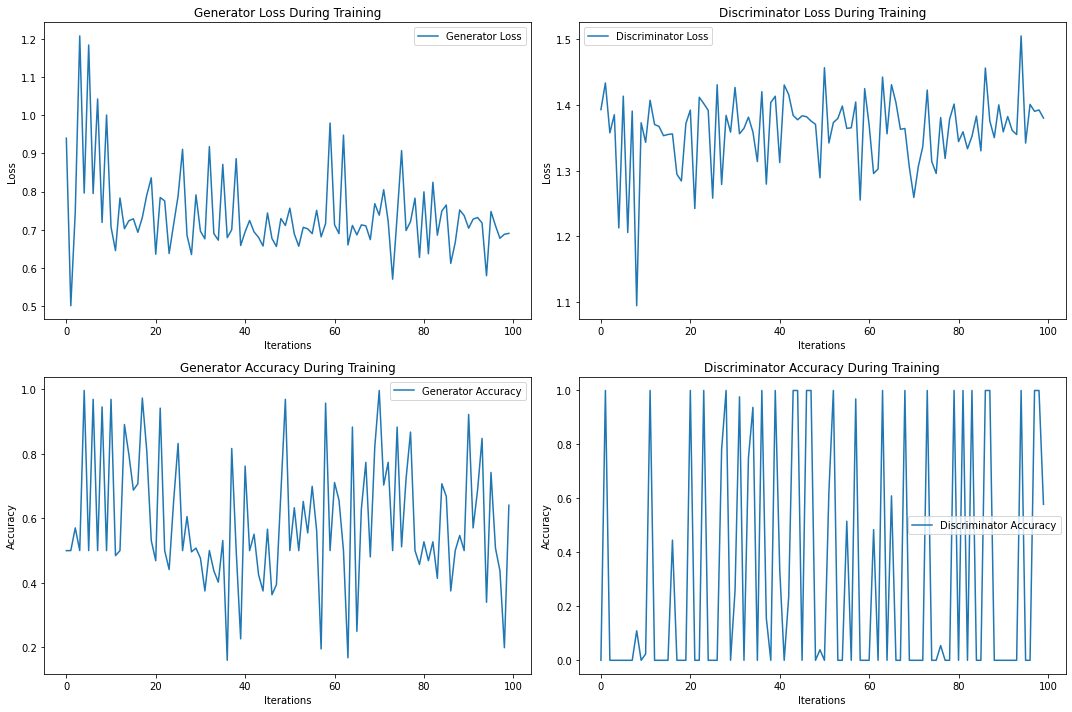

In [27]:
# 使real_data的label
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot generator loss
axes[0, 0].plot(G_losses, label="Generator Loss")
axes[0, 0].set_xlabel("Iterations")
axes[0, 0].set_ylabel("Loss")
axes[0, 0].set_title("Generator Loss During Training")
axes[0, 0].legend()

# Plot discriminator loss
axes[0, 1].plot(D_losses, label="Discriminator Loss")
axes[0, 1].set_xlabel("Iterations")
axes[0, 1].set_ylabel("Loss")
axes[0, 1].set_title("Discriminator Loss During Training")
axes[0, 1].legend()

# Plot generator accuracy
axes[1, 0].plot(G_Accuracys, label="Generator Accuracy")
axes[1, 0].set_xlabel("Iterations")
axes[1, 0].set_ylabel("Accuracy")
axes[1, 0].set_title("Generator Accuracy During Training")
axes[1, 0].legend()

# Plot discriminator accuracy
axes[1, 1].plot(D_Accuracys, label="Discriminator Accuracy")
axes[1, 1].set_xlabel("Iterations")
axes[1, 1].set_ylabel("Accuracy")
axes[1, 1].set_title("Discriminator Accuracy During Training")
axes[1, 1].legend()

plt.tight_layout()
plt.show()

In [34]:
# 不使real_data的label均衡
G_losses = []
D_losses = []
G_Accuracys = []
D_Accuracys = []

# Training
for epoch in range(num_epochs):
    
    discriminator_optimizer.zero_grad() 
    
    real_data = ads_data[torch.randint(0, len(ads_data), (batch_size,))]
    real_condition = real_data[:, 1].unsqueeze(1)
    real_samples = torch.cat((real_data[:, :1], real_data[:, 2:]), dim=1)
    real_labels = torch.ones(batch_size, 1)
    
    # generate fake data
    noise = torch.randn(batch_size, input_size)
    fake_condition = torch.randint(0, 2, (batch_size,1))
    fake_samples = generator(noise, fake_condition)
    fake_labels = torch.zeros(batch_size, 1)
    
    # loss for discriminator 
    real_output = discriminator(real_samples, real_condition)
    fake_output = discriminator(fake_samples.detach(), fake_condition)
    real_loss = criterion(real_output, real_labels)
    fake_loss = criterion(fake_output, fake_labels)
    discriminator_loss = real_loss + fake_loss
    
    discriminator_loss.backward()
    discriminator_optimizer.step()

    # clear gradients
    generator_optimizer.zero_grad() 
    
    # generate fake data
    noise = torch.randn(batch_size, input_size)
    fake_condition = torch.randint(0, 2, (batch_size,1))
    fake_samples = generator(noise, fake_condition)
    fake_output = discriminator(fake_samples, fake_condition)
    
    # loss for generator
    generator_loss = criterion(fake_output, real_labels)
    
    generator_loss.backward()
    generator_optimizer.step()
    
    # Print loss and other information every 100 epochs
    if (epoch + 1) % 100 == 0:
        # Calculate discriminator accuracy
        real_accuracy = (real_output > 0.5).float().mean().item()
        fake_accuracy = (fake_output < 0.5).float().mean().item()
        d_accuracy = 0.5 * (real_accuracy + fake_accuracy)

        # Calculate generator accuracy
        g_accuracy = (fake_output > 0.5).float().mean().item()
        
        G_losses.append(generator_loss.item())
        D_losses.append(discriminator_loss.item())
        G_Accuracys.append(d_accuracy)
        D_Accuracys.append(g_accuracy)
        
        # Print losses and accuracies
        tqdm.write(f"Epoch [{epoch + 1}/{num_epochs}], "
                f"Generator Loss: {generator_loss.item():.4f}, "
                f"Discriminator Loss: {discriminator_loss.item():.4f}, "
                f"Discriminator Accuracy: {d_accuracy:.4f}, "
                f"Generator Accuracy: {g_accuracy:.4f}")

Epoch [100/10000], Generator Loss: 0.8444, Discriminator Loss: 1.2340, Discriminator Accuracy: 0.7383, Generator Accuracy: 0.5078
Epoch [200/10000], Generator Loss: 0.7891, Discriminator Loss: 1.2640, Discriminator Accuracy: 0.7773, Generator Accuracy: 0.4297
Epoch [300/10000], Generator Loss: 0.8388, Discriminator Loss: 1.2169, Discriminator Accuracy: 0.7148, Generator Accuracy: 0.5469
Epoch [400/10000], Generator Loss: 0.8706, Discriminator Loss: 1.2486, Discriminator Accuracy: 0.7344, Generator Accuracy: 0.4844
Epoch [500/10000], Generator Loss: 0.7824, Discriminator Loss: 1.2654, Discriminator Accuracy: 0.7344, Generator Accuracy: 0.5078
Epoch [600/10000], Generator Loss: 0.8522, Discriminator Loss: 1.2513, Discriminator Accuracy: 0.7500, Generator Accuracy: 0.4844
Epoch [700/10000], Generator Loss: 0.8242, Discriminator Loss: 1.2365, Discriminator Accuracy: 0.7422, Generator Accuracy: 0.5000
Epoch [800/10000], Generator Loss: 0.8108, Discriminator Loss: 1.2996, Discriminator Accur

Epoch [6400/10000], Generator Loss: 0.8060, Discriminator Loss: 1.2493, Discriminator Accuracy: 0.7305, Generator Accuracy: 0.5234
Epoch [6500/10000], Generator Loss: 0.8067, Discriminator Loss: 1.2578, Discriminator Accuracy: 0.7266, Generator Accuracy: 0.5312
Epoch [6600/10000], Generator Loss: 0.8356, Discriminator Loss: 1.2687, Discriminator Accuracy: 0.7500, Generator Accuracy: 0.4609
Epoch [6700/10000], Generator Loss: 0.8508, Discriminator Loss: 1.2733, Discriminator Accuracy: 0.8008, Generator Accuracy: 0.3984
Epoch [6800/10000], Generator Loss: 0.8536, Discriminator Loss: 1.2049, Discriminator Accuracy: 0.7734, Generator Accuracy: 0.4375
Epoch [6900/10000], Generator Loss: 0.8191, Discriminator Loss: 1.2866, Discriminator Accuracy: 0.7383, Generator Accuracy: 0.5000
Epoch [7000/10000], Generator Loss: 0.8236, Discriminator Loss: 1.2591, Discriminator Accuracy: 0.7578, Generator Accuracy: 0.4766
Epoch [7100/10000], Generator Loss: 0.7982, Discriminator Loss: 1.2571, Discriminat

In [32]:
# generate new data point
noise = torch.randn(100, input_size)
condition = torch.randint(0, 2, (100,1))
generated_data = generator(noise, condition).detach().numpy()
# generated_data.shape
generated_data = np.concatenate((generated_data[:, :1], condition.float().numpy(), generated_data[:, 1:]), axis=1)
generated_data = scaler.inverse_transform(generated_data)
generated_data[generated_data < 0] = 0 # set negative values to 0
generated_data = np.round(generated_data).astype(int)  # round to nearest integer
generated_df = pd.DataFrame(generated_data, columns = ads.columns) # convert to dataframe
generated_df.head()

(100, 62)

In [12]:
ads.iloc[100000:100005, :]

,log_id,label,user_id,age,gender,residence,city,city_rank,series_dev,series_group,...,ad_close_list_v003_1,ad_close_list_v003_2,ad_close_list_v003_3,ad_close_list_v003_4,ad_close_list_v003_5,u_newsCatInterestsST_1,u_newsCatInterestsST_2,u_newsCatInterestsST_3,u_newsCatInterestsST_4,u_newsCatInterestsST_5
100000,558337,0,115633,8,2,16,185,2,30,3,...,173,0,0,0,0,216,171,65,86,65
100001,558339,0,115633,8,2,16,185,2,30,3,...,173,0,0,0,0,216,171,65,86,65
100002,558341,0,115633,8,2,16,185,2,30,3,...,173,0,0,0,0,216,171,65,86,65
100003,558343,0,115633,8,2,16,185,2,30,3,...,173,0,0,0,0,216,171,65,86,65
100004,426771,0,115634,8,2,13,103,2,34,7,...,173,0,0,0,0,108,112,62,114,168


In [33]:
ads.shape

(7675517, 63)